In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      115              0              0        0  35.3   
1            2      197             70             45      543  30.5   
2            4      110             92              0        0  37.6   
3           10      168             74              0        0  38.0   
4           10      139             80              0        0  27.1   

   DiabetesPedigreeFunction  Age  diagnosis  
0                     0.134   29          0  
1                     0.158   53          1  
2                     0.191   30          0  
3                     0.537   34          1  
4                     1.441   57          0

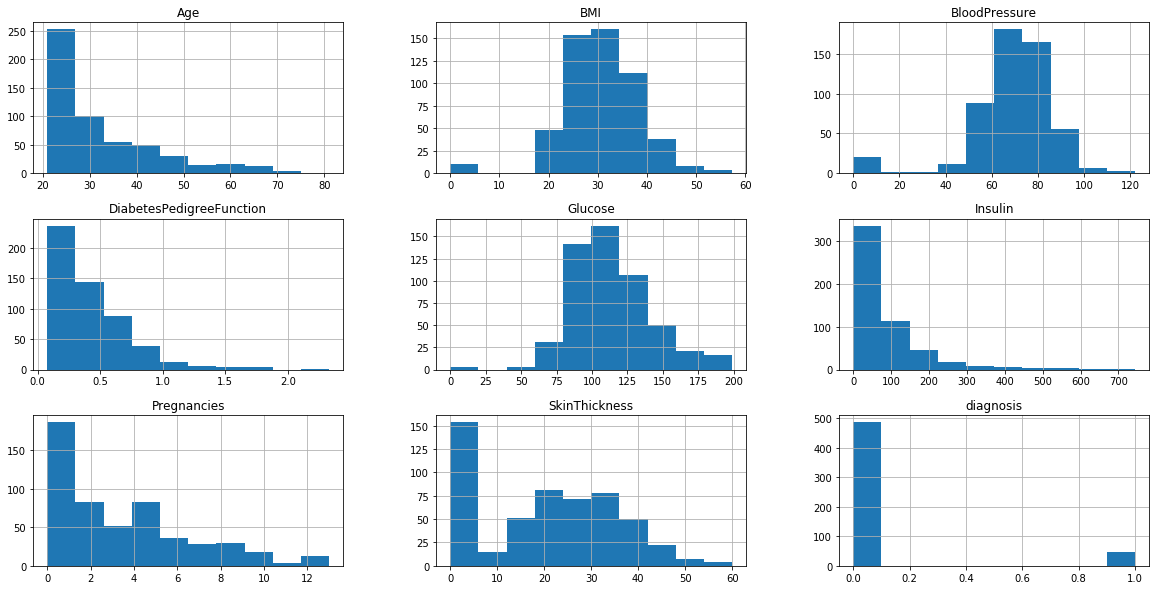

In [3]:
diabetes_data.hist(figsize=(20,10));

In [4]:
y = diabetes_data.diagnosis
X = diabetes_data.drop('diagnosis', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state =27)

In [6]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [7]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
y_pred = logistic_model.predict(X_test)

In [9]:
pd.crosstab(y_pred,y_test)

diagnosis    0   1
row_0             
0          123  10
1            1   0

In [10]:
from sklearn import metrics

In [11]:
#ACC meansure how many model predicitions were correct

metrics.accuracy_score(y_test,y_pred)

0.917910447761194

In [12]:
#PREC measure of how many posative identifications were correct 

metrics.precision_score(y_test,y_pred)

0.0

In [13]:
#RECALL measure of how many posative ids in original dataset were correctly idenitified by the model

metrics.recall_score(y_test,y_pred)

0.0

In [14]:
X = pd.concat([X_train, y_train], axis=1)

In [15]:
X = X.reset_index(drop=True)

In [16]:
non_diabetic = diabetes_data[diabetes_data.diagnosis==0]

diabetic = diabetes_data[diabetes_data.diagnosis==1]

In [17]:
from sklearn.utils import resample 

In [18]:
diabetic.head()
non_diabetic.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      115              0              0        0  35.3   
2            4      110             92              0        0  37.6   
4           10      139             80              0        0  27.1   
6            1      103             30             38       83  43.3   
7            3      126             88             41      235  39.3   

   DiabetesPedigreeFunction  Age  diagnosis  
0                     0.134   29          0  
2                     0.191   30          0  
4                     1.441   57          0  
6                     0.183   33          0  
7                     0.704   27          0

In [19]:
over_sampled = resample(diabetic,
                           replace=True,
                           n_samples = len(non_diabetic),
                           random_state=27)

In [20]:
over_sampled.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
200           10      161             68             23      132  25.5   
84             0      113             76              0        0  33.3   
414            1      181             78             42      293  40.0   
460            1      199             76             43        0  42.9   
290            2      134             70              0        0  28.9   

     DiabetesPedigreeFunction  Age  diagnosis  
200                     0.326   47          1  
84                      0.278   23          1  
414                     1.258   22          1  
460                     1.394   22          1  
290                     0.542   23          1

In [21]:
over_sampled = pd.concat((non_diabetic,over_sampled))
over_sampled.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      115              0              0        0  35.3   
2            4      110             92              0        0  37.6   
4           10      139             80              0        0  27.1   
6            1      103             30             38       83  43.3   
7            3      126             88             41      235  39.3   

   DiabetesPedigreeFunction  Age  diagnosis  
0                     0.134   29          0  
2                     0.191   30          0  
4                     1.441   57          0  
6                     0.183   33          0  
7                     0.704   27          0

In [22]:
over_sampled = over_sampled.reset_index(drop=True)
over_sampled.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      115              0              0        0  35.3   
1            4      110             92              0        0  37.6   
2           10      139             80              0        0  27.1   
3            1      103             30             38       83  43.3   
4            3      126             88             41      235  39.3   

   DiabetesPedigreeFunction  Age  diagnosis  
0                     0.134   29          0  
1                     0.191   30          0  
2                     1.441   57          0  
3                     0.183   33          0  
4                     0.704   27          0

In [23]:
over_sampled.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
398            0      132             78              0        0  32.4   
715            3      174             58             22      194  32.9   
833           13      158            114              0        0  42.3   
77             1      118             58             36       94  33.3   
814            4      171             72              0        0  43.6   

     DiabetesPedigreeFunction  Age  diagnosis  
398                     0.393   21          0  
715                     0.593   36          1  
833                     0.257   44          1  
77                      0.261   23          0  
814                     0.479   26          1

In [24]:
y_train = over_sampled.diagnosis

X_train = over_sampled.drop('diagnosis', axis=1)

In [25]:
logistic_model = LogisticRegression(solver='liblinear')

In [26]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = logistic_model.predict(X_test)

In [28]:
pd.crosstab(y_pred, y_test)

diagnosis    0  1
row_0            
0          101  1
1           23  9

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.8208955223880597

In [30]:
metrics.precision_score(y_test, y_pred)

0.28125

In [31]:
metrics.recall_score(y_test, y_pred)

0.9